#### Read Dataset

In [18]:
import pandas as pd

In [19]:
df=pd.read_csv("hepatitis.csv")

In [20]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [21]:
df.shape

(142, 20)

In [22]:
df.isnull().sum()  # check null value 

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [23]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1.816901,40.816901,1.105634,1.514085,1.838028,1.359155,1.619718,1.795775,1.823944,1.584507,1.809859,1.669014,1.880282,1.880282,1.382958,105.647887,83.507042,3.830493,61.704225,1.443662
std,0.388116,12.189182,0.308456,0.501571,0.369729,0.481451,0.487174,0.404561,0.382216,0.494551,0.393801,0.472234,0.325781,0.325781,1.166526,47.375099,82.417700,0.618103,17.696732,0.498575
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,78.500000,32.250000,3.500000,56.250000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,100.000000,58.000000,3.900000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.480000,119.750000,99.500000,4.200000,66.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

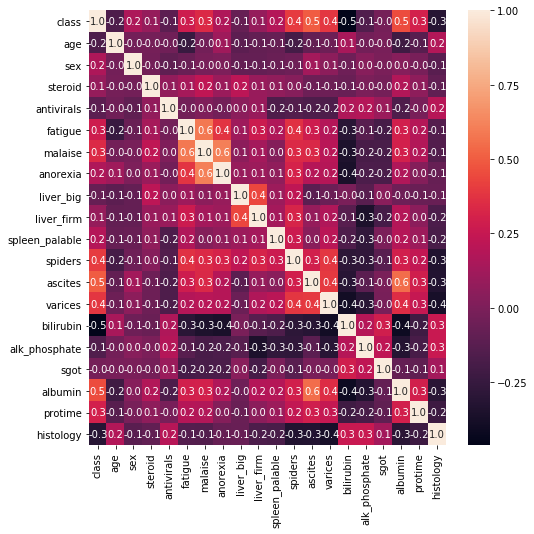

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='.1f')### confusion matrix of dataset
plt.show()

In [26]:
df['class'].value_counts()

2    116
1     26
Name: class, dtype: int64

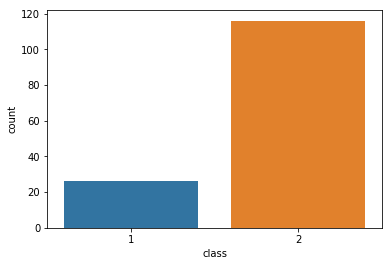

In [27]:
sns.countplot(x="class", data=df)
plt.show()

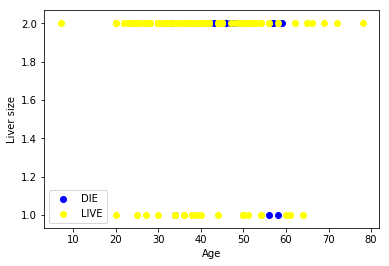

In [28]:
plt.scatter(x=df.age[df['class']==1], y=df.liver_big[(df['class']==1)], c="blue")
plt.scatter(x=df.age[df['class']==2], y=df.liver_big[(df['class']==2)],c="yellow")
plt.legend(["DIE", "LIVE"])
plt.xlabel("Age")
plt.ylabel("Liver size")
yplt.show()

In [29]:
x = df.drop(['class'], axis = 1)
y = df.histology.values

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


#### Train test devide 

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

### data preprocess with standard scaler 

In [33]:
stdc=StandardScaler()
x_train=stdc.fit_transform(x_train)
x_test=stdc.transform(x_test)

#### Naive Bias

In [34]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print("Confusion Matrix for Gaussian Naive Bayes:")
print(confusion_matrix(y_test,predgnb))
print("Score:",round(accuracy_score(y_test,predgnb)*100,2))
print("Classification Report:",classification_report(y_test,predgnb))

Confusion Matrix for Gaussian Naive Bayes:
[[22  0]
 [ 0 14]]
Score: 100.0
Classification Report:              precision    recall  f1-score   support

          1       1.00      1.00      1.00        22
          2       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        36



In [35]:
acc1=metrics.accuracy_score(y_test, predgnb)
print("Accuracy:",round(acc1*100),"%")

Accuracy: 100.0 %


### SVM

In [36]:
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[22  0]
 [ 0 14]]
Score: 100.0
Classification Report:              precision    recall  f1-score   support

          1       1.00      1.00      1.00        22
          2       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        36



In [37]:
acc2=metrics.accuracy_score(y_test,predsvm)
print("Accuracy:",round(acc2*100),"%")

Accuracy: 100.0 %


#### Decision Tree

In [38]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[22  0]
 [ 0 14]]
Score: 100.0
Classification Report:              precision    recall  f1-score   support

          1       1.00      1.00      1.00        22
          2       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        36



In [39]:
acc3=metrics.accuracy_score(y_test,preddt)
print("Accuracy:",round(acc3*100),"%")

Accuracy: 100.0 %


### Accuracy Comparison graph


In [42]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('NB','SVM','DT')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Best Accuracy')


Text(0.5,1,'Best Accuracy')

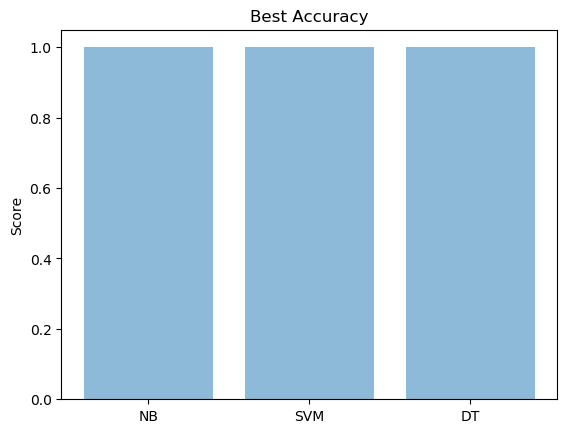

In [43]:
plt.show()

#### Test Output

In [143]:
age=int(input("Enter age :"))   
sex=int(input("Enter sex :"))   
steroid=int(input("Enter steroid :"))   
antivirals=int(input("Enter antivirals :"))   
fatigue=int(input("Enter fatigue :"))   
malaise=int(input("Enter malaise :"))              
anorexia=int(input("Enter anorexia :"))  
liver_big=int(input("Enter liver_big :"))
liver_firm=int(input("Enter liver_firm :"))       
spleen_palable=int(input("Enter spleen_palable :"))  
spiders=int(input("Enter spiders :"))         
ascites=int(input("Enter ascites :"))          
varices=int(input("Enter varices :"))          
bilirubin=float(input("Enter bilirubin :"))        
alk_phosphate=int(input("Enter alk_phosphate :"))    
sgot=int(input("Enter sgot :"))             
albumin=float(input("Enter albumin :"))          
protime=int(input("Enter protime :"))
histology=int(input("Enter histology :"))


Enter age :30
Enter sex :2
Enter steroid :1
Enter antivirals :2
Enter fatigue :2
Enter malaise :2
Enter anorexia :2
Enter liver_big :1
Enter liver_firm :2
Enter spleen_palable :2
Enter spiders :2
Enter ascites :2
Enter varices :2
Enter bilirubin :1
Enter alk_phosphate :85
Enter sgot :18
Enter albumin :4
Enter protime :61
Enter histology :1


In [144]:
testresult1=gnb.predict([[age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites
,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology]])
print(testresult1)

[2]


In [145]:
print("Naive Bias algorithm Prediction Result")
if testresult1==1:
    print("DIE")
else:
    print("LIVE")

Naive Bias algorithm Prediction Result
LIVE


In [146]:
testresult2=svm.predict([[age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites
,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology]])
print(testresult2)


[2]


In [147]:
print("Support Vector algorithm Prediction Result")
if testresult2==1:
    print("DIE")
else:
    print("LIVE")

Support Vector algorithm Prediction Result
LIVE


In [148]:
testresult3=dt.predict([[age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites
,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology]])
print(testresult3)

[2]


In [149]:
print("Decision Tree algorithm Prediction Result")
if testresult3==1:
    print("DIE")
else:
    print("LIVE")

Decision Tree algorithm Prediction Result
LIVE
